# DSMarket - First look at input files

## 1. Importing libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import xgboost as xgb

from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## 2. Paths and directories

In [2]:
sales_data_path = "C:/Users/Enrique/Downloads/DSMarket/DSMarket/data_dsmarket/data_dsmarket/item_sales.csv"
calendar_data_path = "C:/Users/Enrique/Downloads/DSMarket\DSMarket/data_dsmarket/data_dsmarket/daily_calendar_with_events.csv"
prices_data_path = "C:/Users/Enrique/Downloads/DSMarket/DSMarket/data_dsmarket/data_dsmarket/item_prices.csv"

## 3. Import files

### 3A. Sales data

In [3]:
pd_sales = pd.read_csv(sales_data_path, sep = ",")
print("The shape of the sales datataframe is :", pd_sales.shape)

The shape of the sales datataframe is : (30490, 1920)


In [4]:
pd_sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,2,2,0,0,0,1,1,0,2,0,1,1,2,0,1,0,0,0,2,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,

In [5]:
pd_sales.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 1920 columns):
 #     Column      Dtype 
---    ------      ----- 
 0     id          object
 1     item        object
 2     category    object
 3     department  object
 4     store       object
 5     store_code  object
 6     region      object
 7     d_1         int64 
 8     d_2         int64 
 9     d_3         int64 
 10    d_4         int64 
 11    d_5         int64 
 12    d_6         int64 
 13    d_7         int64 
 14    d_8         int64 
 15    d_9         int64 
 16    d_10        int64 
 17    d_11        int64 
 18    d_12        int64 
 19    d_13        int64 
 20    d_14        int64 
 21    d_15        int64 
 22    d_16        int64 
 23    d_17        int64 
 24    d_18        int64 
 25    d_19        int64 
 26    d_20        int64 
 27    d_21        int64 
 28    d_22        int64 
 29    d_23        int64 
 30    d_24        int64 
 31    d_25        int64 
 32  

How many **stores** are there in the data? 

In [6]:
print("There are {} stores in the data, and the number of registers per store are: ".format(pd_sales.store.nunique()))
pd_sales.store.value_counts()

There are 10 stores in the data, and the number of registers per store are: 


store
Greenwich_Village    3049
Harlem               3049
Tribeca              3049
Brooklyn             3049
South_End            3049
Roxbury              3049
Back_Bay             3049
Midtown_Village      3049
Yorktown             3049
Queen_Village        3049
Name: count, dtype: int64

How many **departments**?

In [7]:
print("There are {} departments in the data, and the number of registers per department are: ".format(pd_sales.item.nunique()))
pd_sales.item.value_counts()

There are 3049 departments in the data, and the number of registers per department are: 


item
SUPERMARKET_3_827    10
ACCESORIES_1_001     10
ACCESORIES_1_002     10
ACCESORIES_1_003     10
ACCESORIES_1_004     10
                     ..
ACCESORIES_1_014     10
ACCESORIES_1_013     10
ACCESORIES_1_012     10
ACCESORIES_1_011     10
ACCESORIES_1_010     10
Name: count, Length: 3049, dtype: int64

And **items**? 

In [8]:
print("There are {} departments in the data, and the number of registers per item are: ".format(pd_sales.department.nunique()))
pd_sales.department.value_counts()

There are 7 departments in the data, and the number of registers per item are: 


department
SUPERMARKET_3      8230
HOME_&_GARDEN_1    5320
HOME_&_GARDEN_2    5150
ACCESORIES_1       4160
SUPERMARKET_2      3980
SUPERMARKET_1      2160
ACCESORIES_2       1490
Name: count, dtype: int64

Do we have one register per id? In other words, can two registers have the same id? 

In [9]:
print(pd_sales.shape)
print(pd_sales.id.drop_duplicates().shape)

(30490, 1920)
(30490,)


In [10]:
pd_sales[pd_sales.id == 'ACCESORIES_1_002_NYC_1'].T

,1
id,ACCESORIES_1_002_NYC_1
item,ACCESORIES_1_002
category,ACCESORIES
department,ACCESORIES_1
store,Greenwich_Village
...,...
d_1909,1
d_1910,0
d_1911,0
d_1912,0


### 3B. Calendar data

In [11]:
pd_calendar = pd.read_csv(calendar_data_path, sep = ",")
print("The shape of the calendar datataframe is :", pd_calendar.shape)

The shape of the calendar datataframe is : (1913, 5)


In [12]:
pd_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [13]:
pd_calendar.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [14]:
print("The range of dates available are: {} - {}".format(pd_calendar['date'].min(),pd_calendar['date'].max()))

The range of dates available are: 2011-01-29 - 2016-04-24


What sort of events do we have? 

In [15]:
pd_calendar.event.value_counts()

event
SuperBowl         6
Ramadan starts    5
Thanksgiving      5
NewYear           5
Easter            5
Name: count, dtype: int64

We don't have a lot of events, but we can think about including additional ones in a later stage (it might help!) 

### 3C. Prices data

In [16]:
pd_prices = pd.read_csv(prices_data_path, sep = ",")
print("The shape of the prices datataframe is :", pd_prices.shape)

The shape of the prices datataframe is : (6965706, 5)


In [17]:
pd_prices.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,328.00",12.74
1,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,329.00",12.74
2,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,330.00",10.99
3,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,331.00",10.99
4,ACCESORIES_1_001,ACCESORIES,NYC_1,"201,332.00",10.99


In [18]:
pd_prices.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


Same number of items in the prices data? 

In [19]:
print("There are {} items in the data, and the number of registers per item are: ".format(pd_prices.item.nunique()))
pd_prices.item.value_counts()

There are 3049 items in the data, and the number of registers per item are: 


item
SUPERMARKET_3_793      2870
ACCESORIES_1_010       2870
SUPERMARKET_3_792      2870
SUPERMARKET_3_822      2870
SUPERMARKET_3_812      2870
                       ... 
HOME_&_GARDEN_1_308     652
HOME_&_GARDEN_1_159     633
HOME_&_GARDEN_1_242     610
SUPERMARKET_3_296       602
SUPERMARKET_2_379       543
Name: count, Length: 3049, dtype: int64

The number of items does match, but there are many registers per item. It seems that prices per item can change with time

Let's take a loook at the variables distribution of the prices dataframe

In [20]:
pd_prices.describe()

,yearweek,sell_price
count,"6,721,786.00","6,965,706.00"
mean,"201,382.42",5.52
std,145.02,4.39
min,"201,105.00",0.01
25%,"201,248.00",2.62
50%,"201,410.00",4.20
75%,"201,515.00",7.18
max,"201,617.00",134.15


In [21]:
pd_prices.describe(include=['object'])

,item,category,store_code
count,6965706,6965706,6965706
unique,3049,3,10
top,SUPERMARKET_3_793,SUPERMARKET,BOS_2
freq,2870,3239821,713960


In [22]:
pd_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [23]:
from datetime import datetime, timedelta
def weekyearnum(dt):
    return dt.strftime("%Y%W")

def myweeyearknum(dt):
    offsetdt = dt + timedelta(days=+2);  # you add 3 days to Mon to get to Thu 
    return weekyearnum(offsetdt)

def weeknum(dt):
    return dt.isocalendar()[1]

def myweeknum(dt):
    offsetdt = dt + timedelta(days=+2);  # you add 3 days to Mon to get to Thu 
    return weeknum(offsetdt)

In [24]:
## Merge
pd_calendar['date'] = pd.to_datetime(pd_calendar['date'], format = "%Y-%m-%d")

pd_calendar['yearweek'] = pd_calendar['date'].apply(lambda x: myweeyearknum(x))

In [25]:
pd_calendar

,date,weekday,weekday_int,d,event,yearweek
0,2011-01-29,Saturday,1,d_1,NaN,201105
1,2011-01-30,Sunday,2,d_2,NaN,201105
2,2011-01-31,Monday,3,d_3,NaN,201105
3,2011-02-01,Tuesday,4,d_4,NaN,201105
4,2011-02-02,Wednesday,5,d_5,NaN,201105
...,...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,NaN,201616
1909,2016-04-21,Thursday,6,d_1910,NaN,201616
1910,2016-04-22,Friday,7,d_1911,NaN,201616
1911,2016-04-23,Saturday,1,d_1912,NaN,201617


In [26]:
pd_calendar['yearweek'] = pd_calendar['yearweek'].astype(float)
pd_merge = pd.merge(pd_prices,pd_calendar[['d','yearweek']], how="left",
                   left_on = 'yearweek', right_on = 'yearweek')

pd_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46271877 entries, 0 to 46271876
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
 5   d           object 
dtypes: float64(2), object(4)
memory usage: 2.1+ GB


In [27]:
pd_sales.set_index(['id','item','category','department','store','store_code','region']).head()

,,,,,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
id,item,category,department,store,store_code,region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [28]:
pd_calendar

,date,weekday,weekday_int,d,event,yearweek
0,2011-01-29,Saturday,1,d_1,NaN,"201,105.00"
1,2011-01-30,Sunday,2,d_2,NaN,"201,105.00"
2,2011-01-31,Monday,3,d_3,NaN,"201,105.00"
3,2011-02-01,Tuesday,4,d_4,NaN,"201,105.00"
4,2011-02-02,Wednesday,5,d_5,NaN,"201,105.00"
...,...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,NaN,"201,616.00"
1909,2016-04-21,Thursday,6,d_1910,NaN,"201,616.00"
1910,2016-04-22,Friday,7,d_1911,NaN,"201,616.00"
1911,2016-04-23,Saturday,1,d_1912,NaN,"201,617.00"


In [29]:
sales_ca=pd_sales[pd_sales['region']=='New York'].loc[:,'d_1':].sum(axis=0)
sales_wi=pd_sales[pd_sales['region']=='California'].loc[:,'d_1':].sum(axis=0)
#sales_tx=pd_sales[pd_sales['state_id']=='TX'].loc[:,'d_1':].sum(axis=0)

state_sales_df=pd.DataFrame({'sales_ca':list(sales_ca),
                             'sales_wi':list(sales_wi),
                             'date':list(pd_calendar['date']),
                             'weekday':pd_calendar['weekday_int'],
                              'yearweek':pd_calendar['yearweek'],
                              'weekday_int':pd_calendar['weekday_int']})

In [30]:
state_sales_df.head()

,sales_ca,sales_wi,date,weekday,yearweek,weekday_int
0,14195,0,2011-01-29,1,"201,105.00",1
1,13805,0,2011-01-30,2,"201,105.00",2
2,10108,0,2011-01-31,3,"201,105.00",3
3,11047,0,2011-02-01,4,"201,105.00",4
4,9925,0,2011-02-02,5,"201,105.00",5


In [31]:
pd_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


# EDA

In [32]:
# Seleccionamos solo las regiones que nos interesan
regions_of_interest = ['New York', 'Boston', 'Philadelphia']

# Filtrar el dataset de ventas
filtered_sales = pd_sales[pd_sales['region'].isin(regions_of_interest)].copy()

print("Shape del dataset filtrado:", filtered_sales.shape)
print("Regiones presentes:", filtered_sales['region'].unique())

Shape del dataset filtrado: (30490, 1920)
Regiones presentes: ['New York' 'Boston' 'Philadelphia']


In [33]:
# Detectar columnas de días
day_cols = [col for col in filtered_sales.columns if col.startswith('d_')]

# Transformar a formato largo
sales_long = filtered_sales.melt(
    id_vars=['id', 'item', 'category', 'department', 'store', 'store_code', 'region'],
    value_vars=day_cols,
    var_name='d',          # Día tipo 'd_1', 'd_2', etc.
    value_name='sales'     # Ventas reales
)

print("Shape de sales_long:", sales_long.shape)
print(sales_long.head())

Shape de sales_long: (58327370, 9)
                       id              item    category    department  \
0  ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_002_NYC_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_003_NYC_1  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_004_NYC_1  ACCESORIES_1_004  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_005_NYC_1  ACCESORIES_1_005  ACCESORIES  ACCESORIES_1   

               store store_code    region    d  sales  
0  Greenwich_Village      NYC_1  New York  d_1      0  
1  Greenwich_Village      NYC_1  New York  d_1      0  
2  Greenwich_Village      NYC_1  New York  d_1      0  
3  Greenwich_Village      NYC_1  New York  d_1      0  
4  Greenwich_Village      NYC_1  New York  d_1      0  


## Weekly Sales

Para poder tener un mejor entendimiento de nuestro problema de negocio juntaremos las ventas por semanas

In [34]:
# Sumar ventas por semana
weekly_sales = sales_long.merge(
    pd_calendar[['d', 'yearweek']],
    on='d', how='left'
).groupby(
    ['id', 'item', 'store_code', 'region', 'yearweek']
).agg({'sales': 'sum'}).reset_index()

In [35]:
# Asegurarnos de que yearweek en precios es numérico y no tiene nulos
pd_prices = pd_prices[pd_prices['yearweek'].notna()]
pd_prices['yearweek'] = pd_prices['yearweek'].astype(int)

# Igualamos yearweek en weekly_sales por seguridad
weekly_sales['yearweek'] = weekly_sales['yearweek'].astype(int)

# Hacemos el merge
weekly_sales = weekly_sales.merge(
    pd_prices[['item', 'store_code', 'yearweek', 'sell_price']],
    on=['item', 'store_code', 'yearweek'],
    how='left'
)

# Verificar resultado
print("Shape después del merge:", weekly_sales.shape)
print(weekly_sales.head())


Shape después del merge: (8506710, 7)
                       id              item store_code  region  yearweek  \
0  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001      BOS_1  Boston    201105   
1  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001      BOS_1  Boston    201106   
2  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001      BOS_1  Boston    201107   
3  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001      BOS_1  Boston    201108   
4  ACCESORIES_1_001_BOS_1  ACCESORIES_1_001      BOS_1  Boston    201109   

   sales  sell_price  
0      0         NaN  
1      0         NaN  
2      0         NaN  
3      0         NaN  
4      0         NaN  


## NaN

Una vez generado nuestro dataset con el que trabajaremos en adelante pasamos a analizar los NAN y como imputarlos

In [36]:
# Ver cuántos NaN tenemos en sell_price
nan_sell_price = weekly_sales['sell_price'].isna().sum()
total_rows = len(weekly_sales)

print(f"Total de filas: {total_rows}")
print(f"Filas con sell_price NaN: {nan_sell_price}")
print(f"Porcentaje de NaN en sell_price: {(nan_sell_price / total_rows) * 100:.2f}%")

Total de filas: 8506710
Filas con sell_price NaN: 1784924
Porcentaje de NaN en sell_price: 20.98%


In [37]:
nan_prices = weekly_sales[weekly_sales['sell_price'].isna()]
print("Shape de nan_prices:", nan_prices.shape)

Shape de nan_prices: (1784924, 7)


In [38]:
# Agrupar los NaN por año-semana
nan_by_yearweek = nan_prices['yearweek'].value_counts().sort_index()

# Mostrar
print(nan_by_yearweek)

yearweek
201105    19558
201106    18515
201107    17971
201108    17691
201109    17457
201110    17156
201111    16889
201112    16686
201113    16537
201114    16345
201115    16161
201116    15975
201117    15887
201118    15769
201119    15665
201120    15609
201121    15567
201122    15480
201123    15426
201124    15367
201125    15320
201126    15272
201127    15216
201128    15166
201129    15098
201130    15028
201131    14930
201132    14835
201133    14746
201134    14676
201135    14610
201136    14519
201137    14458
201138    14379
201139    14293
201140    14234
201141    14169
201142    14110
201143    14071
201144    14037
201145    14019
201146    13990
201147    13968
201148    13925
201149    13901
201150    13875
201151    13844
201152    13796
201200    13796
201201    13728
201202    13634
201203    13558
201204    13454
201205    13260
201206    13107
201207    12919
201208    12766
201209    12623
201210    12411
201211    12215
201212    12114
201213    12029

In [39]:
# Top 10 productos sin precio
top_items_nan = nan_prices['item'].value_counts().head(10)
print("Top items sin precio:")
print(top_items_nan)

# Top 10 tiendas sin precio
top_stores_nan = nan_prices['store_code'].value_counts().head(10)
print("Top tiendas sin precio:")
print(top_stores_nan)

Top items sin precio:
item
SUPERMARKET_2_379      2327
SUPERMARKET_3_296      2268
HOME_&_GARDEN_1_242    2260
HOME_&_GARDEN_1_159    2237
HOME_&_GARDEN_1_308    2218
SUPERMARKET_2_253      2200
HOME_&_GARDEN_2_186    2194
SUPERMARKET_3_353      2188
HOME_&_GARDEN_1_489    2165
HOME_&_GARDEN_1_534    2164
Name: count, dtype: int64
Top tiendas sin precio:
store_code
NYC_2    226061
PHI_1    196854
PHI_2    184517
NYC_4    183688
BOS_3    171381
NYC_3    168478
PHI_3    166316
NYC_1    163990
BOS_1    162536
BOS_2    161103
Name: count, dtype: int64


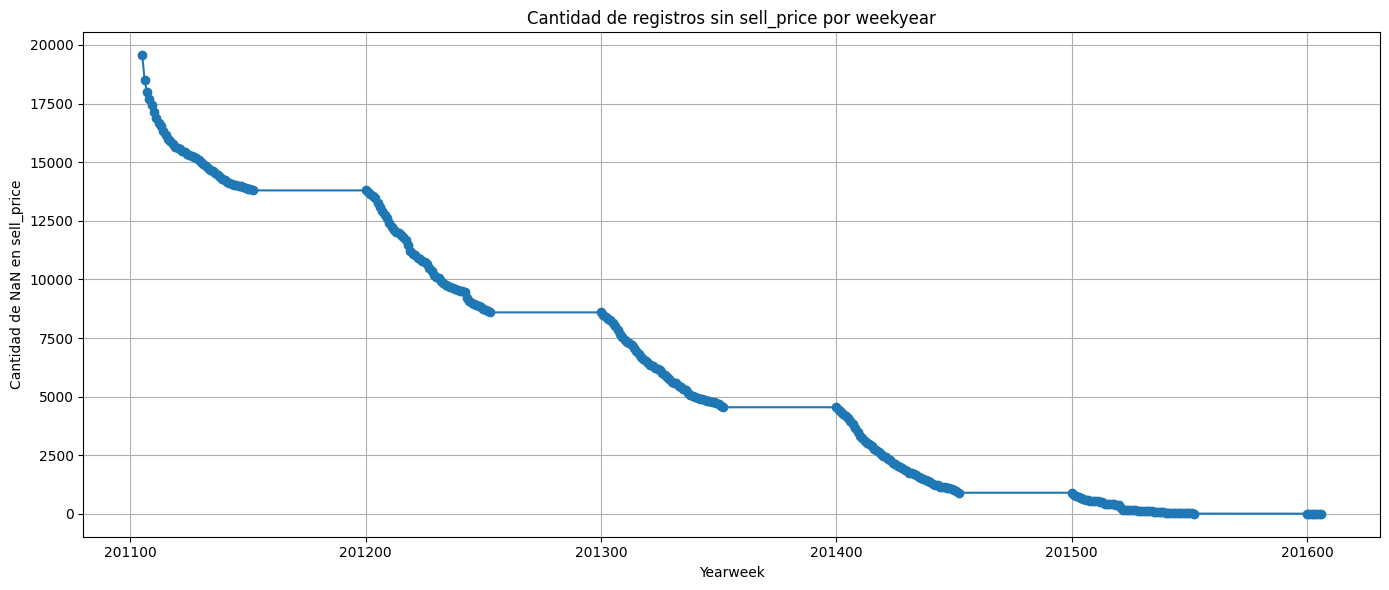

In [ ]:
# Agrupar NaNs por yearweek
nan_by_yearweek = weekly_sales[weekly_sales['sell_price'].isna()]['yearweek'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(14,6))
plt.plot(nan_by_yearweek.index, nan_by_yearweek.values, marker='o')
plt.title('Cantidad de registros sin sell_price por weekyear')
plt.xlabel('Yearweek')
plt.ylabel('Cantidad de NaN en sell_price')
plt.grid(True)
plt.tight_layout()
plt.show()

Segun la grafica podemos ver un alto volumen de valores nulos en las fechas previas 2013, esto se puede deber a la falta de registros durante esas fechas 

In [41]:
# Filtrar ventas solo a partir de yearweek 201328
weekly_sales_filtered = weekly_sales[weekly_sales['yearweek'] >= 201328].copy()

print(f"Shape después de filtrar yearweek >= 201328: {weekly_sales_filtered.shape}")

Shape después de filtrar yearweek >= 201328: (4543010, 7)


In [42]:
# Ver cuántos NaN quedan en sell_price
nan_sell_price_filtered = weekly_sales_filtered['sell_price'].isna().sum()
total_rows_filtered = len(weekly_sales_filtered)

print(f"Total de filas tras filtro: {total_rows_filtered}")
print(f"Filas con sell_price NaN tras filtro: {nan_sell_price_filtered}")
print(f"Porcentaje de NaN tras filtro: {(nan_sell_price_filtered / total_rows_filtered) * 100:.2f}%")

Total de filas tras filtro: 4543010
Filas con sell_price NaN tras filtro: 265266
Porcentaje de NaN tras filtro: 5.84%


In [43]:
# Eliminar filas con sell_price NaN
weekly_sales_clean = weekly_sales_filtered[weekly_sales_filtered['sell_price'].notna()].copy()

print("Shape final del dataset limpio:", weekly_sales_clean.shape)

Shape final del dataset limpio: (4277744, 7)


## Sales per City

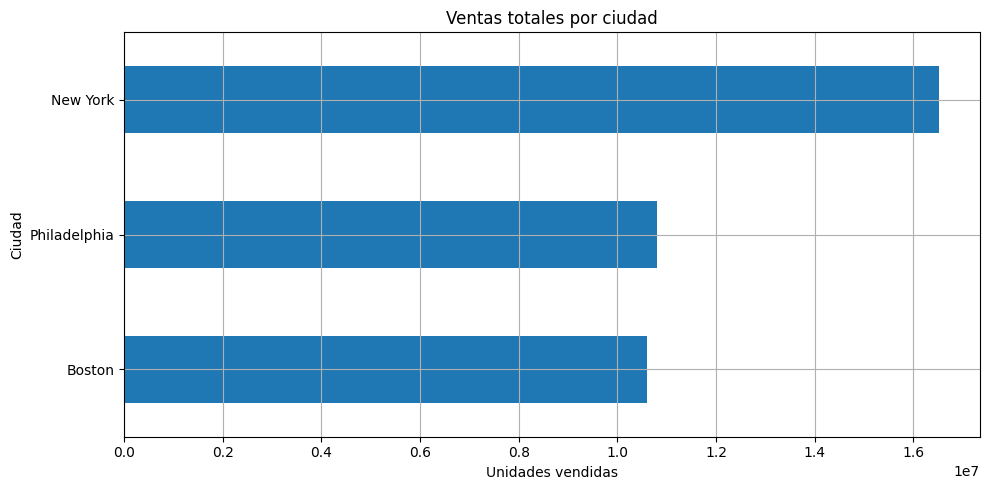

In [ ]:
# Ventas totales por ciudad
ventas_por_region = weekly_sales_clean.groupby('region')['sales'].sum().sort_values()

# Gráfico
ventas_por_region.plot(kind='barh', figsize=(10, 5))
plt.title('Ventas totales por ciudad')
plt.xlabel('Unidades vendidas')
plt.ylabel('Ciudad')
plt.grid(True)
plt.tight_layout()
plt.show()

Como primer inside de nuestro EDA podemos observar que NY tiene un volumen considerablemente más alto que las ciudades de Philadelphia y Boston

## Sales per City and Product

C:\Users\Enrique\AppData\Local\Temp\ipykernel_3008\2841034219.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_products_each_city = top_products_city.groupby('region').apply(


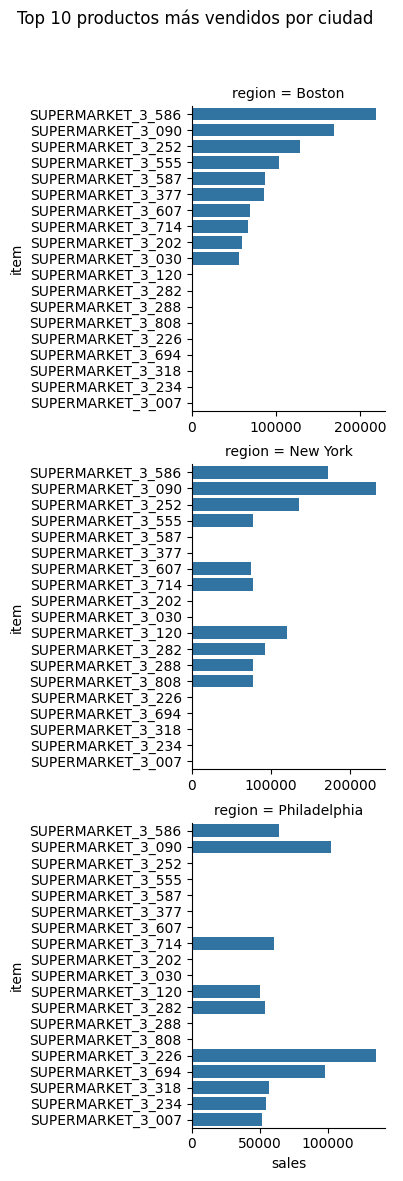

In [ ]:
# Agrupamos ventas por ciudad y producto
top_products_city = weekly_sales_clean.groupby(['region', 'item'])['sales'].sum().reset_index()

# Para cada ciudad, coger el top 10
top_10_products_each_city = top_products_city.groupby('region').apply(
    lambda x: x.nlargest(10, 'sales')
).reset_index(drop=True)

# Gráfica
g = sns.catplot(
    data=top_10_products_each_city, 
    x="sales", y="item", 
    col="region", 
    kind="bar", 
    col_wrap=1, 
    height=4, 
    sharex=False
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Top 10 productos más vendidos por ciudad')
plt.show()

Puntos importantes:
- El producto 'SUPERMARKET_3_586' es el líder en las tres ciudades
- Hay más productos como 'SUPERMARKET_3_090', '3_525' etc, que también son muy populares sin embargo esta popularidad varia entre ciudad
- En philadelphia los productos top venden menos unidades que en NY o Boston

## ventas semanales por ciudad

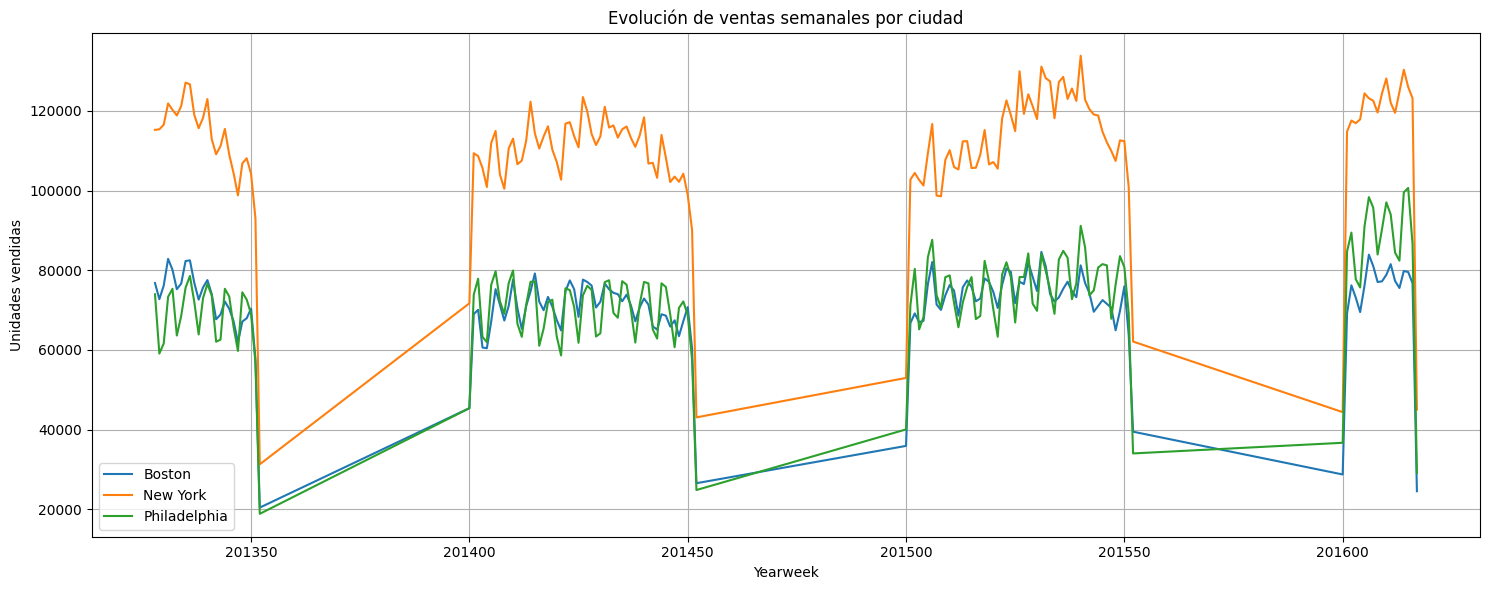

In [ ]:
# Agrupar ventas por fecha (yearweek) y ciudad
ventas_semanales = weekly_sales_clean.groupby(['yearweek', 'region'])['sales'].sum().reset_index()

# Gráfico
plt.figure(figsize=(15, 6))
for region in ventas_semanales['region'].unique():
    region_data = ventas_semanales[ventas_semanales['region'] == region]
    plt.plot(region_data['yearweek'], region_data['sales'], label=region)

plt.title('Evolución de ventas semanales por ciudad')
plt.xlabel('Yearweek')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

En la evolución de ventas semanales podemos ver como cada año hay subidas estacionales y luego caídas. Estas caídas o cortes suelen suceder a finales de año lo cual es normal por ser fin de ciclo anual.

Después de dichos cortes anuales el volumen de ventas suele recuperarse cada año, pero dicha recuperación suele ser menos en las ciudades de Boston y Phili

## Dispersión de precios por producto y ciudad

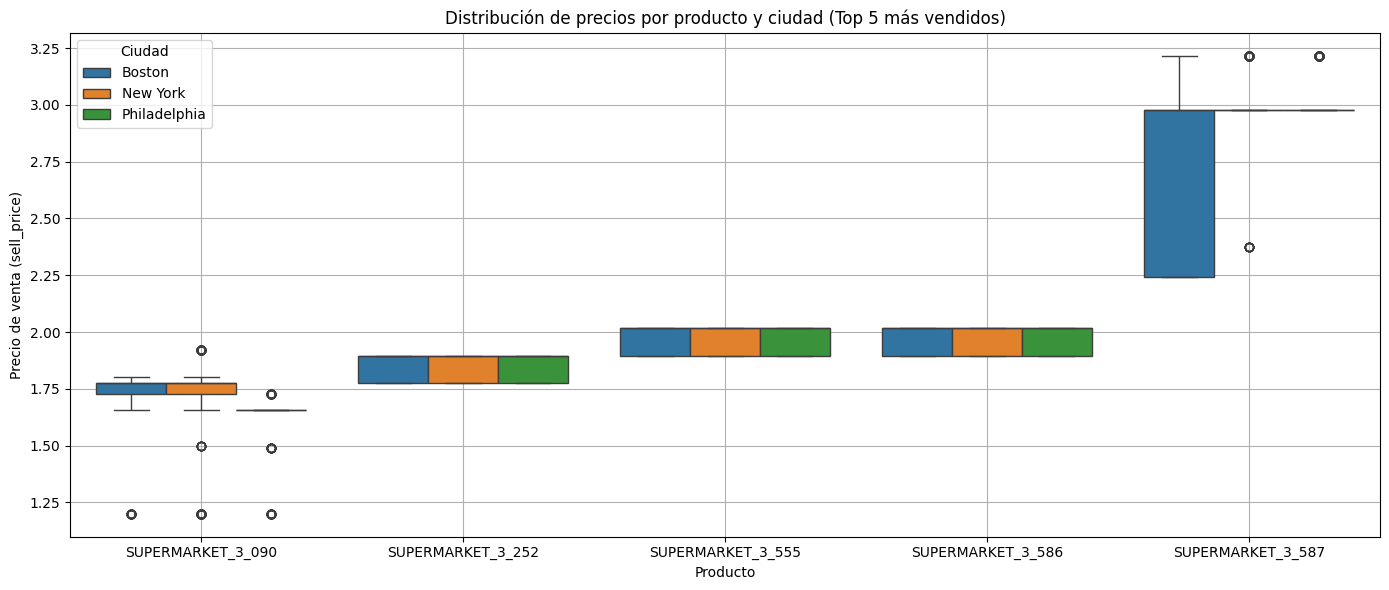

In [ ]:
# Top N productos más vendidos
top_items = weekly_sales_clean.groupby('item')['sales'].sum().nlargest(5).index.tolist()

# Filtrar solo esos productos
precios_top_items = weekly_sales_clean[weekly_sales_clean['item'].isin(top_items)]

# Gráfico de caja por ciudad
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=precios_top_items, 
    x='item', y='sell_price', 
    hue='region'
)
plt.title('Distribución de precios por producto y ciudad (Top 5 más vendidos)')
plt.xlabel('Producto')
plt.ylabel('Precio de venta (sell_price)')
plt.grid(True)
plt.legend(title='Ciudad')
plt.tight_layout()
plt.show()

Podemos observar que el precio de los productos varia mucho segun la ciudad. Hay productos como el '3_586' y '3_555' que se mantien estables en todo el país. Pero asi mismo hay otros como '3_090' o '3_587' que muestran una variación significativa.

En conclusión hay una oportunidad de explotar un pricing inteligente según ciudad  y competencia. 

### Histograma de precios por ciudad

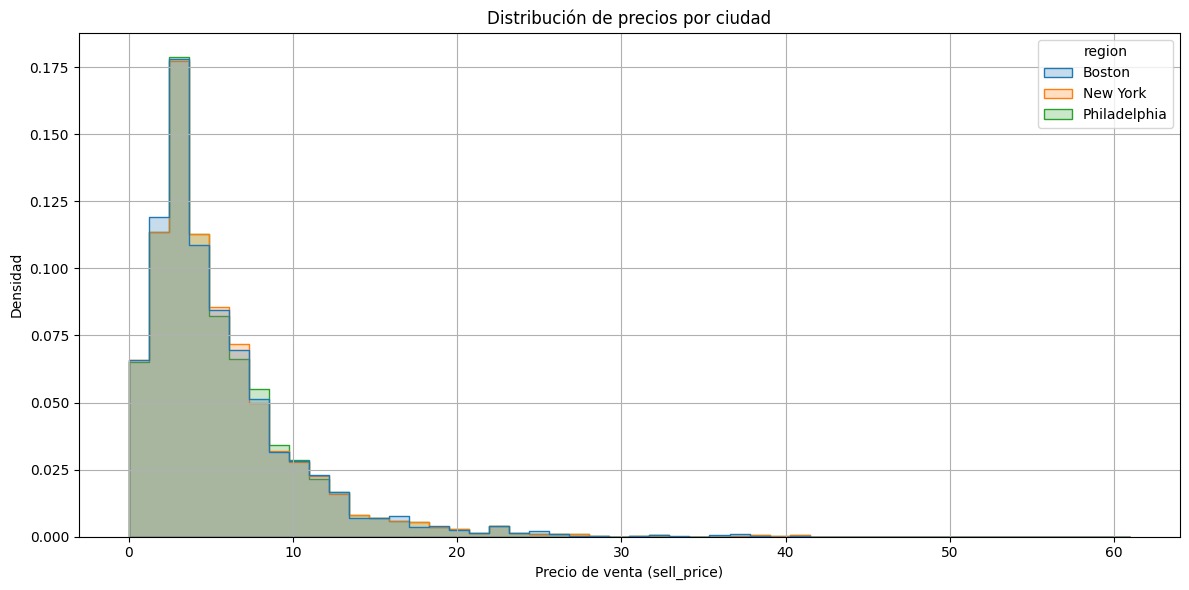

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(data=weekly_sales_clean, x='sell_price', hue='region', element="step", stat="density", common_norm=False, bins=50)
plt.title('Distribución de precios por ciudad')
plt.xlabel('Precio de venta (sell_price)')
plt.ylabel('Densidad')
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos observar que en las tres ciudades hay una distribución practicamente identica entre los productos. Hay un pico en los precios de 3 a 5 euros lo que corresponde a la mayoria de productos vendidos. 

Existen valores dentro de precios altos (10, 20 y 40 euros) aunque son la minoria 



### evolución temporal de precios

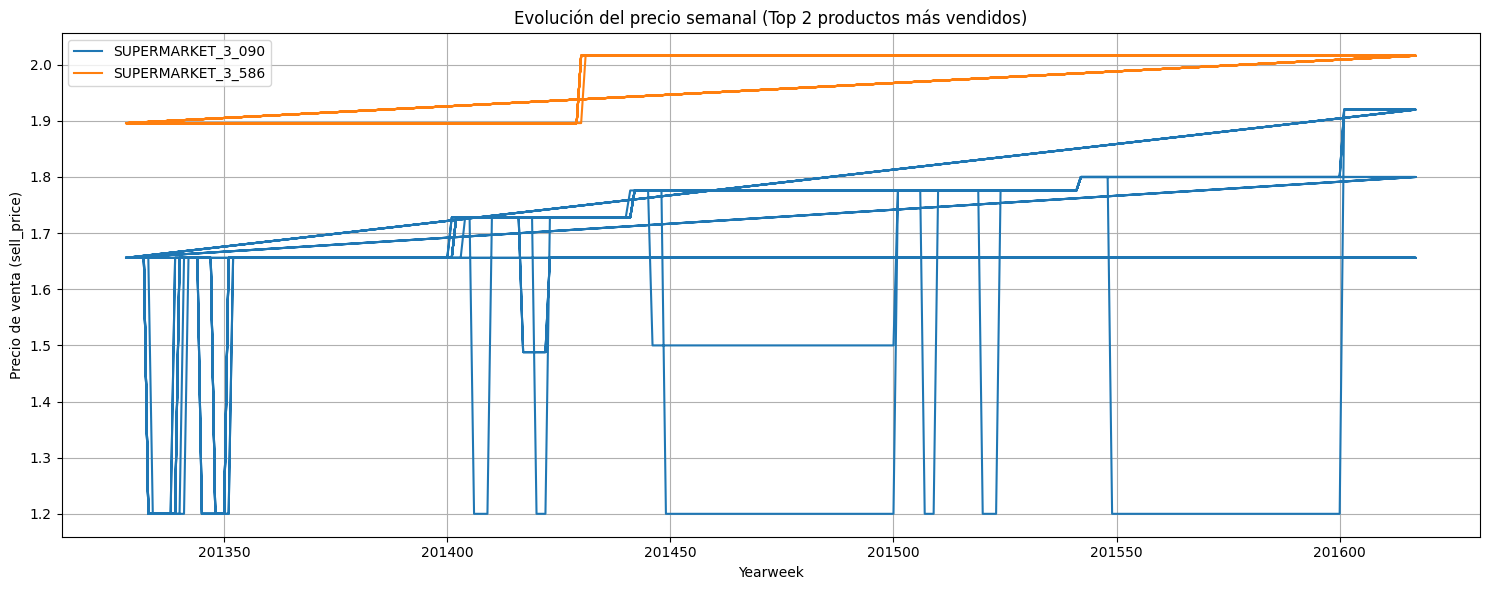

In [49]:
# Elegimos el Top 2 productos más vendidos
top_2_items = weekly_sales_clean.groupby('item')['sales'].sum().nlargest(2).index.tolist()

# Filtrar dataset para esos productos
precios_top2 = weekly_sales_clean[weekly_sales_clean['item'].isin(top_2_items)]

# Gráfico de evolución del precio
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
for item in top_2_items:
    subset = precios_top2[precios_top2['item'] == item]
    plt.plot(subset['yearweek'], subset['sell_price'], label=item)

plt.title('Evolución del precio semanal (Top 2 productos más vendidos)')
plt.xlabel('Yearweek')
plt.ylabel('Precio de venta (sell_price)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos ver una clara diferencia entre la evolución de los precios entre el top 2 de nuestros productos, uno muestra una subida progresiva mientras que el otro muestra una evolución mas erratica y descontrolada. 

### productos con mayor dispersión de precios

In [50]:
# Calcular la desviación estándar del precio por producto
price_std_by_item = weekly_sales_clean.groupby('item')['sell_price'].std().reset_index()

# Ordenar descendente y ver el top
price_std_by_item = price_std_by_item.sort_values('sell_price', ascending=False).rename(columns={'sell_price': 'price_std'})

print("Top 10 productos con mayor variabilidad de precio:")
print(price_std_by_item.head(10))

Top 10 productos con mayor variabilidad de precio:
                     item  price_std
1561  HOME_&_GARDEN_2_466       5.53
352      ACCESORIES_1_361       2.17
58       ACCESORIES_1_060       2.17
302      ACCESORIES_1_311       2.17
217      ACCESORIES_1_225       2.17
1387  HOME_&_GARDEN_2_292       2.03
818   HOME_&_GARDEN_1_259       1.96
2065    SUPERMARKET_2_239       1.83
153      ACCESORIES_1_158       1.78
1173  HOME_&_GARDEN_2_077       1.67


La tabla muestra un top 10 de productos que están perdiendo relevancia semana tras semana y corren riesgo de desaparecer de las cestas de compra

## Detectar productos en declive

In [ ]:
# Calcular tendencia de ventas semanales por producto
tendencias = []

# Agrupamos por producto
for item, df in weekly_sales_clean.groupby('item'):
    ventas_semanales = df.groupby('yearweek')['sales'].sum().reset_index()

    # Evitamos productos con pocas semanas (para evitar ruido)
    if len(ventas_semanales) >= 10:
        x = ventas_semanales['yearweek']
        y = ventas_semanales['sales']
        slope, _, r_value, _, _ = linregress(x, y)

        tendencias.append({'item': item, 'slope': slope, 'r2': r_value**2})

# Convertimos a DataFrame
tendencias_df = pd.DataFrame(tendencias)

# Ordenamos por caída más pronunciada
productos_en_declive = tendencias_df.sort_values('slope').head(10)

print("Top 10 productos con tendencia negativa más fuerte:")
print(productos_en_declive)


Top 10 productos con tendencia negativa más fuerte:
                   item  slope   r2
2314  SUPERMARKET_3_090  -6.20 0.06
2542  SUPERMARKET_3_318  -4.10 0.20
2255  SUPERMARKET_3_030  -3.78 0.33
2765  SUPERMARKET_3_541  -3.76 0.26
2859  SUPERMARKET_3_635  -3.69 0.23
3029  SUPERMARKET_3_808  -3.35 0.18
2505  SUPERMARKET_3_281  -3.27 0.24
2831  SUPERMARKET_3_607  -3.27 0.24
2543  SUPERMARKET_3_319  -2.63 0.19
2985  SUPERMARKET_3_764  -2.44 0.42


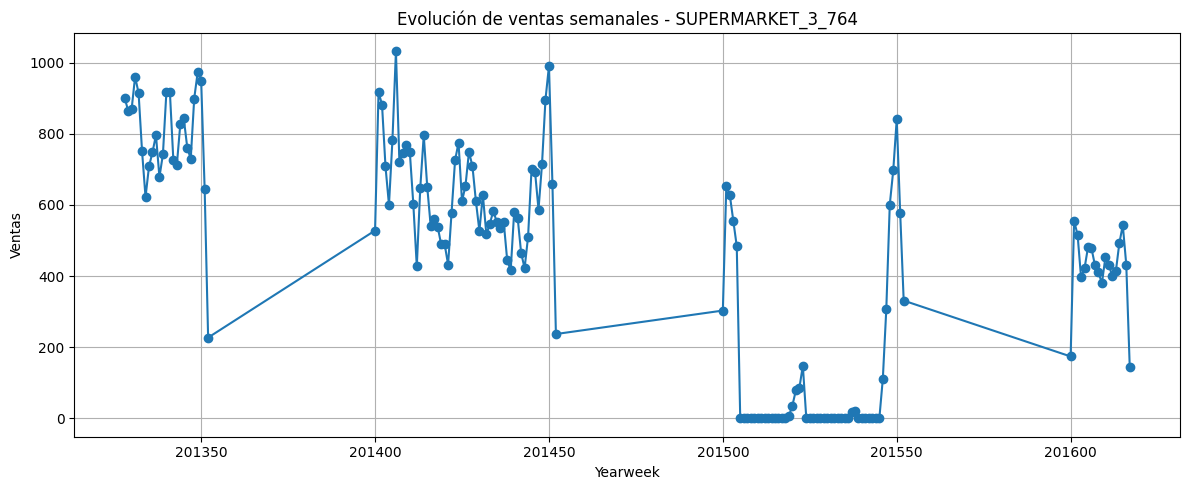

In [52]:
# Elegimos uno de los productos en declive
producto = 'SUPERMARKET_3_764'

# Ventas semanales
ventas_declive = weekly_sales_clean[weekly_sales_clean['item'] == producto]
ventas_semanales = ventas_declive.groupby('yearweek')['sales'].sum().reset_index()

# Gráfico
plt.figure(figsize=(12, 5))
plt.plot(ventas_semanales['yearweek'], ventas_semanales['sales'], marker='o')
plt.title(f'Evolución de ventas semanales - {producto}')
plt.xlabel('Yearweek')
plt.ylabel('Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusiones EDA

Luego de un analisis exhaustivo de nuestros datos podemos rescatar ciertos puntos clave
- NY es la ciudad con más volumen de ventas
- Esta diferencia se puede explicar ya sea por más tiendas activas o una mayor penetración en su mercado
- Debido a que los productos populares suelen ser los mismos entre ciudades pero en un orden diferente esto sugiere que hay oportunidad de personalización en campañas o stock
- Se identificaron patrones estacionales claros de ventas
- Se identificaron productos claros en caida de ventas

# Clustering

## Clustering de productos

In [53]:
# Pivot: productos como filas, yearweeks como columnas
pivot_product_week = weekly_sales_clean.pivot_table(
    index='item', 
    columns='yearweek', 
    values='sales', 
    aggfunc='sum',
    fill_value=0
)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot_product_week)

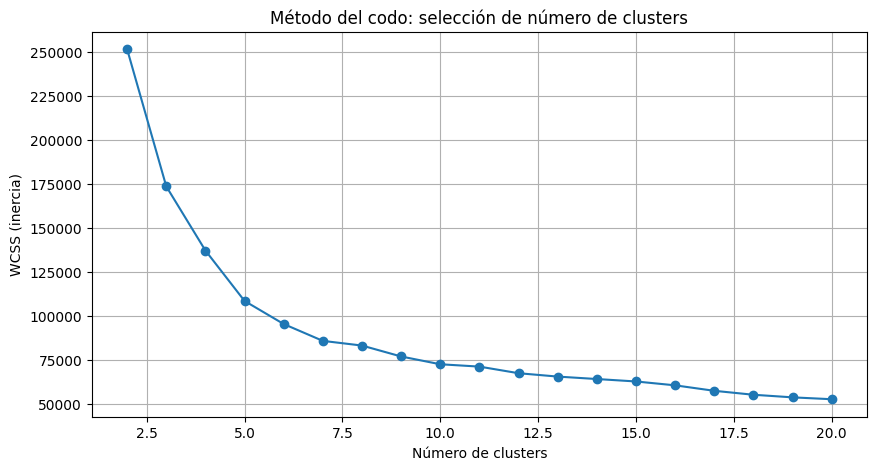

In [ ]:
wcss = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(2, 21), wcss, marker='o')
plt.title('Método del codo: selección de número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (inercia)')
plt.grid(True)
plt.show()

In [56]:
kmeans = KMeans(n_clusters=5, random_state=42)
pivot_product_week['cluster'] = kmeans.fit_predict(X_scaled)

In [57]:
pivot_product_week['cluster'].value_counts()

cluster
0    2592
2     370
1      76
3       9
4       2
Name: count, dtype: int64

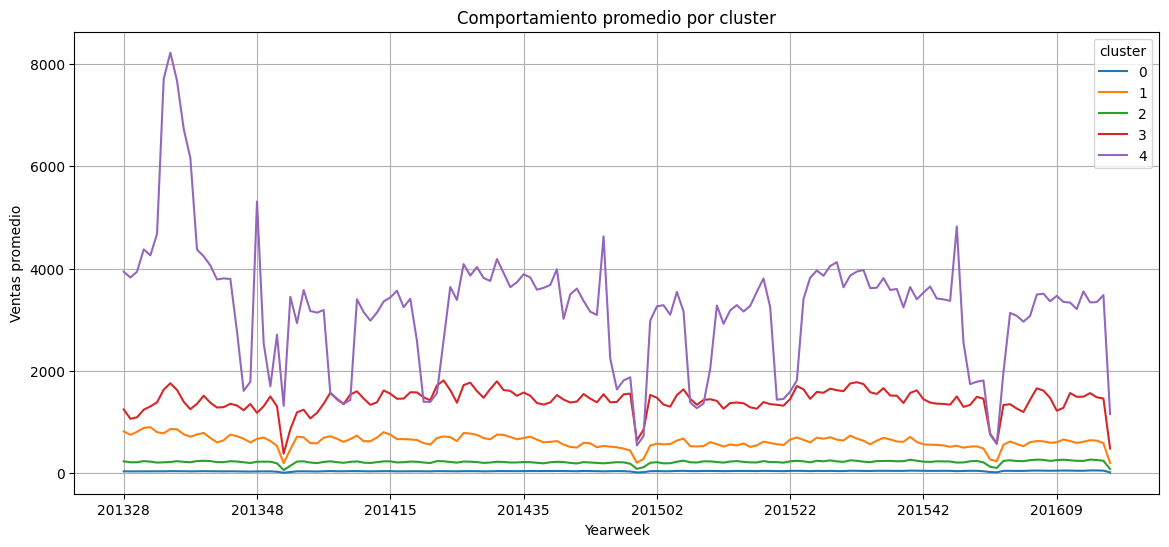

In [58]:
cluster_profiles = pivot_product_week.groupby('cluster').mean().T
cluster_profiles.plot(figsize=(14,6), legend=True)
plt.title("Comportamiento promedio por cluster")
plt.xlabel("Yearweek")
plt.ylabel("Ventas promedio")
plt.grid(True)
plt.show()

Gracias a nuestras graficas logramos deducir que el numero indicado para nuestros clusters son 5 y que cada uno de estos tienen un comportamiento especifico.
- 4: Tienen ventas muy altas, probablemente sean nuestros productos estrellas
- 3: Ventas constantes lo cual sean productos más basicos 
- 1: Un volumen relatibamente más bajo pero estable
- 2: Ventas muy bajas, lo cual pueda mostrar nuestros productos en declive
- 0: Los mas bajos de todos, los productos candidatos a ser descontinuados 

## Clustering de tiendas

In [59]:
# Agrupar ventas semanales por tienda
pivot_store_week = weekly_sales_clean.pivot_table(
    index='store_code',
    columns='yearweek',
    values='sales',
    aggfunc='sum',
    fill_value=0
)

In [ ]:
scaler = StandardScaler()
X_store_scaled = scaler.fit_transform(pivot_store_week)

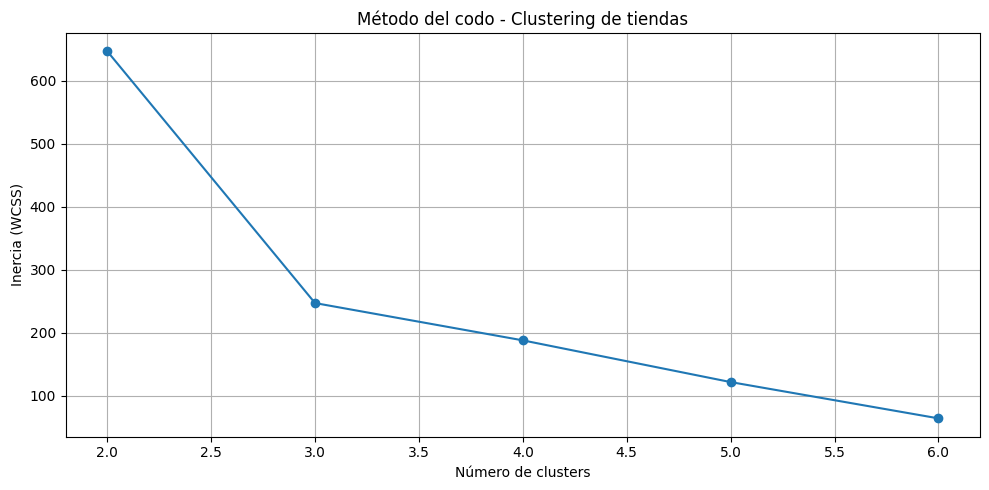

In [ ]:
wcss = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_store_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 7), wcss, marker='o')
plt.title('Método del codo - Clustering de tiendas')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia (WCSS)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
kmeans_store = KMeans(n_clusters=3, random_state=42)
pivot_store_week['cluster'] = kmeans_store.fit_predict(X_store_scaled)

In [63]:
pivot_store_week['cluster'].value_counts()

cluster
1    5
2    4
0    1
Name: count, dtype: int64

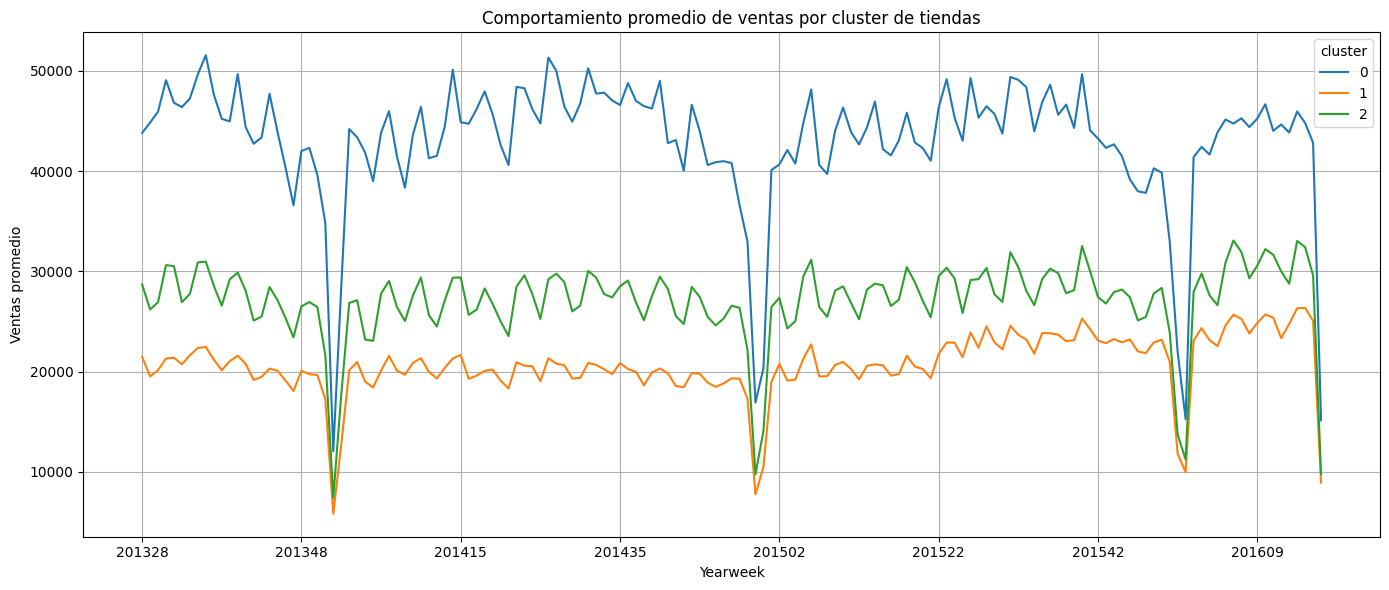

In [64]:
pivot_store_week.groupby('cluster').mean().T.plot(figsize=(14, 6))
plt.title("Comportamiento promedio de ventas por cluster de tiendas")
plt.xlabel("Yearweek")
plt.ylabel("Ventas promedio")
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos observar claramente que el numero ideal para nuestros clusters en tiendas es de 3.
- 0: Muestra una estacionalidad clara, nuestras tiendas top con un volumen alto en ventas.
- 2: Una estacionalidad moderada lo cual muestra un potencial de crecimiento.
- 1: Un menor volumen de ventas, tiendas de bajo rendimiento. 

# Predicción de ventas

## Primer Benchmark

In [ ]:
def yearweek_to_date(yearweek):
    year = int(str(yearweek)[:4])
    week = int(str(yearweek)[4:])
    return datetime.datetime.strptime(f'{year}-W{week}-1', "%Y-W%W-%w")

weekly_sales_clean['date'] = weekly_sales_clean['yearweek'].apply(yearweek_to_date)

### Creación de nuevas features

In [66]:
# Inicializamos la nueva columna
weekly_sales_clean['days_since_last_sale'] = np.nan

# Creamos la variable dentro del groupby
for (item, store), group in weekly_sales_clean.groupby(['item', 'store_code']):
    last_sale_date = None
    days_since_last = []

    for idx, row in group.iterrows():
        if row['sales'] > 0:
            last_sale_date = row['date']
            days_since_last.append(0)
        else:
            if last_sale_date is None:
                days_since_last.append(np.nan)  # No hay venta previa aún
            else:
                delta = (row['date'] - last_sale_date).days
                days_since_last.append(delta)

    weekly_sales_clean.loc[group.index, 'days_since_last_sale'] = days_since_last

In [67]:
# Añadir variables temporales desde 'date'
weekly_sales_clean['date'] = pd.to_datetime(weekly_sales_clean['date'])
weekly_sales_clean['weekday'] = weekly_sales_clean['date'].dt.weekday
weekly_sales_clean['month'] = weekly_sales_clean['date'].dt.month
weekly_sales_clean['weekofyear'] = weekly_sales_clean['date'].dt.isocalendar().week

In [68]:
print(weekly_sales_clean.columns)

Index(['id', 'item', 'store_code', 'region', 'yearweek', 'sales', 'sell_price',
       'date', 'days_since_last_sale', 'weekday', 'month', 'weekofyear'],
      dtype='object')


In [69]:
# Ordenar para asegurar consistencia temporal
weekly_sales_clean = weekly_sales_clean.sort_values(['item', 'store_code', 'date'])

# Agrupamos por producto y tienda
group = weekly_sales_clean.groupby(['item', 'store_code'])

# Crear lags
weekly_sales_clean['lag_1'] = group['sales'].shift(1)
weekly_sales_clean['lag_7'] = group['sales'].shift(7)
weekly_sales_clean['lag_28'] = group['sales'].shift(28)

# Crear medias móviles (rolling)
weekly_sales_clean['rolling_mean_7'] = group['sales'].shift(1).rolling(window=7).mean()
weekly_sales_clean['rolling_std_7'] = group['sales'].shift(1).rolling(window=7).std()

weekly_sales_clean['rolling_mean_28'] = group['sales'].shift(1).rolling(window=28).mean()
weekly_sales_clean['rolling_std_28'] = group['sales'].shift(1).rolling(window=28).std()

In [70]:
print("Nulos por columna:")
print(weekly_sales_clean.isnull().sum())

Nulos por columna:
id                           0
item                         0
store_code                   0
region                       0
yearweek                     0
sales                        0
sell_price                   0
date                         0
days_since_last_sale     75240
weekday                      0
month                        0
weekofyear                   0
lag_1                    30490
lag_7                   213430
lag_28                  853355
rolling_mean_7          213430
rolling_std_7           213430
rolling_mean_28         853355
rolling_std_28          853355
dtype: int64


In [71]:
# Eliminamos filas donde hay nulos en las features clave
features_to_check = ['lag_1', 'lag_7', 'lag_28', 'rolling_mean_7', 'rolling_mean_28']
weekly_sales_model = weekly_sales_clean.dropna(subset=features_to_check)

In [72]:
weekly_sales_model['days_since_last_sale'] = weekly_sales_model['days_since_last_sale'].fillna(999)

C:\Users\Enrique\AppData\Local\Temp\ipykernel_3008\802624322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_sales_model['days_since_last_sale'] = weekly_sales_model['days_since_last_sale'].fillna(999)


In [73]:
print(weekly_sales_model.isnull().sum())

id                      0
item                    0
store_code              0
region                  0
yearweek                0
sales                   0
sell_price              0
date                    0
days_since_last_sale    0
weekday                 0
month                   0
weekofyear              0
lag_1                   0
lag_7                   0
lag_28                  0
rolling_mean_7          0
rolling_std_7           0
rolling_mean_28         0
rolling_std_28          0
dtype: int64


### Definir Train y Test

In [74]:
# Definir la fecha de corte (últimas 28 días para test)
cutoff_date = '2016-03-27'

# Split
train_df = weekly_sales_model[weekly_sales_model['date'] <= cutoff_date]
test_df = weekly_sales_model[weekly_sales_model['date'] > cutoff_date]

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (3272259, 19)
Test shape: (152130, 19)


In [75]:
# Features
features = [
    'item', 'store_code', 'sell_price', 'days_since_last_sale',
    'weekday', 'month', 'weekofyear',
    'lag_1', 'lag_7', 'lag_28',
    'rolling_mean_7', 'rolling_std_7',
    'rolling_mean_28', 'rolling_std_28'
]

# Target
target = 'sales'

In [ ]:
for col in ['item', 'store_code']:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

C:\Users\Enrique\AppData\Local\Temp\ipykernel_3008\3861732546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = le.fit_transform(train_df[col])
C:\Users\Enrique\AppData\Local\Temp\ipykernel_3008\3861732546.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = le.transform(test_df[col])
C:\Users\Enrique\AppData\Local\Temp\ipykernel_3008\3861732546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

### XGBoost

In [ ]:
# Definir X y y
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Convertir a DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parámetros
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Entrenar con early stopping
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=20,
    verbose_eval=10
)

# Predicciones
y_pred = xgb_model.predict(dtest)

[0]	train-rmse:20.44861	eval-rmse:18.53889
[10]	train-rmse:11.38721	eval-rmse:10.32917
[20]	train-rmse:9.34528	eval-rmse:9.45419
[30]	train-rmse:8.86961	eval-rmse:9.55514
[40]	train-rmse:8.64827	eval-rmse:9.62644


In [ ]:
# RMSE 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE en validación: {rmse:.2f}")

RMSE en validación: 9.63


### Plot del primer modelo con un RMSE de 9.63

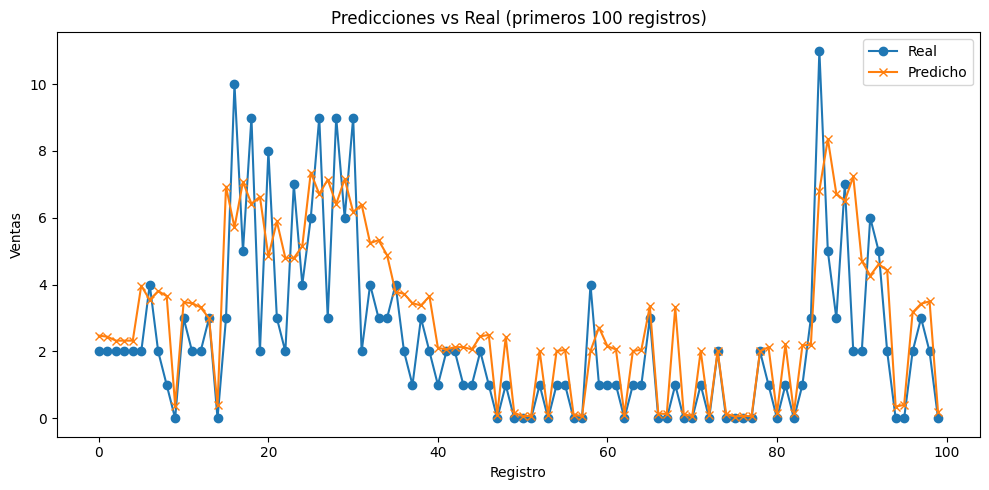

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Real', marker='o')
plt.plot(y_pred[:100], label='Predicho', marker='x')
plt.title('Predicciones vs Real (primeros 100 registros)')
plt.xlabel('Registro')
plt.ylabel('Ventas')
plt.legend()
plt.tight_layout()
plt.show()

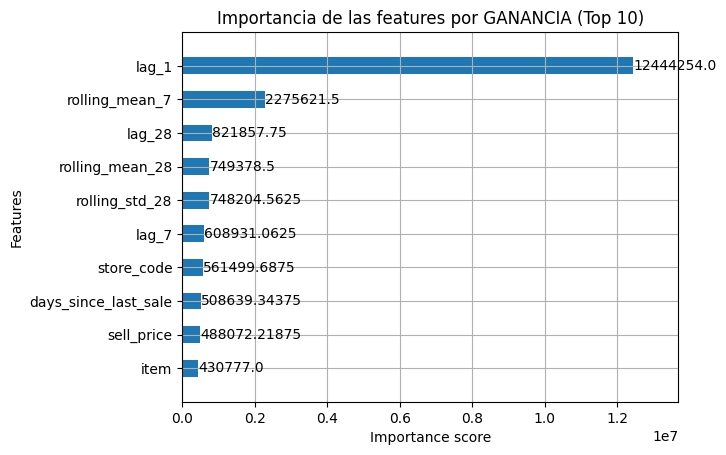

In [82]:
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10, height=0.5)
plt.title('Importancia de las features por GANANCIA (Top 10)')
plt.show()

## Segundo Modelo

In [83]:
# Crear la copia para nuevas features
weekly_sales_model_ext = weekly_sales_model.copy()

In [84]:
# Tendencia: diferencia respecto a la media móvil de 7
weekly_sales_model_ext['trend_7'] = (
    weekly_sales_model_ext['sales'] - weekly_sales_model_ext['rolling_mean_7']
)

# Es fin de semana
weekly_sales_model_ext['is_weekend'] = (
    weekly_sales_model_ext['weekday'].isin([6, 7]).astype(int)
)

# Trimestre del año
weekly_sales_model_ext['quarter'] = weekly_sales_model_ext['date'].dt.quarter

# Precio relativo al promedio histórico del producto
avg_price_per_item = weekly_sales_model_ext.groupby('item')['sell_price'].transform('mean')
weekly_sales_model_ext['relative_price'] = (
    weekly_sales_model_ext['sell_price'] / avg_price_per_item
)

In [85]:
print(weekly_sales_model_ext[['sales', 'trend_7', 'is_weekend', 'quarter', 'relative_price']].head())

     sales  trend_7  is_weekend  quarter  relative_price
158      4     2.71           0        1            1.00
159      0    -1.14           0        1            1.00
160      1     0.00           0        1            1.00
161      0    -0.86           0        1            1.00
162      3     2.14           0        1            1.00


In [88]:
# Definir la fecha de corte (últimas 28 días para test)
cutoff_date = '2016-03-27'

# Split en la copia extendida
train_df_ext = weekly_sales_model_ext[weekly_sales_model_ext['date'] <= cutoff_date]
test_df_ext = weekly_sales_model_ext[weekly_sales_model_ext['date'] > cutoff_date]

In [89]:
features_ext = [
    'item', 'store_code', 'sell_price', 'days_since_last_sale',
    'weekday', 'month', 'weekofyear',
    'lag_1', 'lag_7', 'lag_28',
    'rolling_mean_7', 'rolling_std_7',
    'rolling_mean_28', 'rolling_std_28',
    'trend_7', 'is_weekend', 'quarter', 'relative_price'
]

In [ ]:
for col in ['item', 'store_code']:
    le = LabelEncoder()
    train_df_ext[col] = le.fit_transform(train_df_ext[col])
    test_df_ext[col] = le.transform(test_df_ext[col])

C:\Users\Enrique\AppData\Local\Temp\ipykernel_3008\3993473965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_ext[col] = le.fit_transform(train_df_ext[col])
C:\Users\Enrique\AppData\Local\Temp\ipykernel_3008\3993473965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_ext[col] = le.transform(test_df_ext[col])
C:\Users\Enrique\AppData\Local\Temp\ipykernel_3008\3993473965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# Definir X y y
X_train_ext = train_df_ext[features_ext]
y_train_ext = train_df_ext['sales']
X_test_ext = test_df_ext[features_ext]
y_test_ext = test_df_ext['sales']

# DMatrix
dtrain_ext = xgb.DMatrix(X_train_ext, label=y_train_ext)
dtest_ext = xgb.DMatrix(X_test_ext, label=y_test_ext)

# Parámetros
params_ext = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Entrenar con early stopping
xgb_model_ext = xgb.train(
    params_ext,
    dtrain_ext,
    num_boost_round=500,
    evals=[(dtrain_ext, 'train'), (dtest_ext, 'eval')],
    early_stopping_rounds=20,
    verbose_eval=10
)

[0]	train-rmse:20.23142	eval-rmse:18.36538
[10]	train-rmse:9.28244	eval-rmse:8.20430
[20]	train-rmse:6.24746	eval-rmse:6.03599
[30]	train-rmse:5.41005	eval-rmse:5.61829
[40]	train-rmse:5.04980	eval-rmse:5.47158
[50]	train-rmse:4.78616	eval-rmse:5.36526
[60]	train-rmse:4.68892	eval-rmse:5.30469
[70]	train-rmse:4.64859	eval-rmse:5.27914
[80]	train-rmse:4.61513	eval-rmse:5.25928
[90]	train-rmse:4.55205	eval-rmse:5.20571
[100]	train-rmse:4.47746	eval-rmse:5.17839
[110]	train-rmse:4.40663	eval-rmse:5.14083
[120]	train-rmse:4.27352	eval-rmse:5.09247
[130]	train-rmse:4.11900	eval-rmse:4.99822
[140]	train-rmse:4.03880	eval-rmse:4.95950
[150]	train-rmse:3.94015	eval-rmse:4.91596
[160]	train-rmse:3.87130	eval-rmse:4.87756
[170]	train-rmse:3.79235	eval-rmse:4.84021
[180]	train-rmse:3.75604	eval-rmse:4.81602
[190]	train-rmse:3.72305	eval-rmse:4.78640
[200]	train-rmse:3.67369	eval-rmse:4.75758
[210]	train-rmse:3.62520	eval-rmse:4.72325
[220]	train-rmse:3.60116	eval-rmse:4.70159
[230]	train-rmse:3.5

In [92]:
# Predicciones
y_pred_ext = xgb_model_ext.predict(dtest_ext)

# RMSE
mse_ext = mean_squared_error(y_test_ext, y_pred_ext)
rmse_ext = np.sqrt(mse_ext)
print(f"RMSE con nuevas features: {rmse_ext:.2f}")

RMSE con nuevas features: 4.59


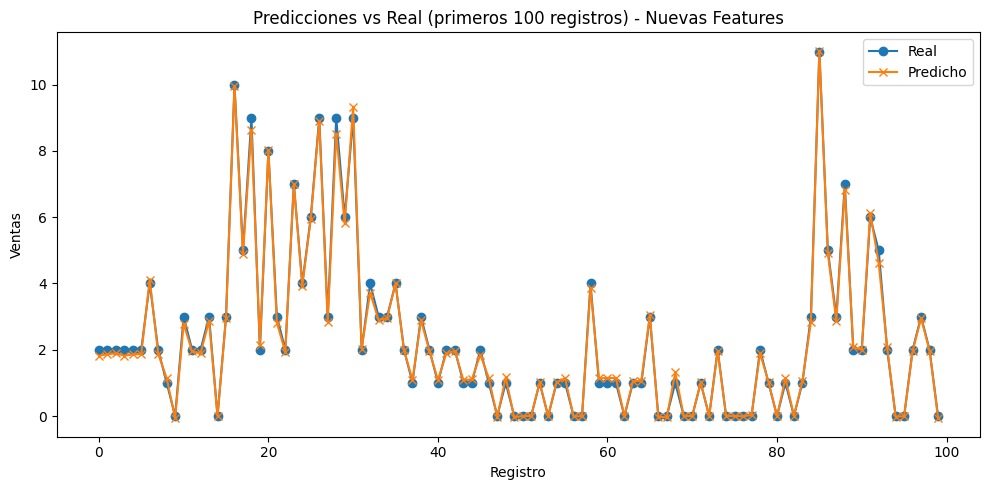

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test_ext.values[:100], label='Real', marker='o')
plt.plot(y_pred_ext[:100], label='Predicho', marker='x')
plt.title('Predicciones vs Real (primeros 100 registros) - Nuevas Features')
plt.xlabel('Registro')
plt.ylabel('Ventas')
plt.legend()
plt.tight_layout()
plt.show()

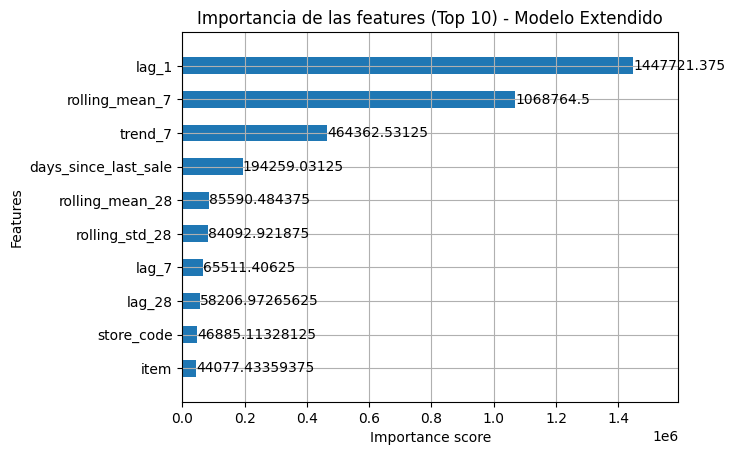

In [94]:
xgb.plot_importance(xgb_model_ext, importance_type='gain', max_num_features=10, height=0.5)
plt.title('Importancia de las features (Top 10) - Modelo Extendido')
plt.show()

# Propuesta para aplicación de modelo 

El modelo de predicción de ventas desarrollado permite anticipar la demanda semanal a nivel tienda-producto, lo cual es fundamental para optimizar el proceso de reposición en las tiendas de DSMarket. Gracias a la granularidad del modelo (predicciones por tienda y producto específicos), podemos calcular con precisión cuántas unidades de cada producto se espera vender en las próximas 4 semanas, facilitando así la planificación del stock de manera proactiva.

## Aplicación practica

- Las predicciones se generarían semanalmente, idealmente antes del inicio del ciclo de abastecimiento (por ejemplo, cada domingo noche o lunes temprano).
- Este dataset servirá como input para los sistemas de gestión de inventario, ajustando automáticamente los pedidos a proveedores o entre almacenes.


## Beneficios esperados

- Reducción del stock sobrante: Ajustar el inventario a la demanda real proyectada.
- Minimización de roturas de stock: Al anticipar la demanda, se reduce el riesgo de quedarse sin producto en momentos críticos.
- Flexibilidad por tienda/ciudad: Detectamos patrones específicos por ciudad (Nueva York, Boston, Filadelfia), lo que permite adaptar la reposición a la demanda local.

## Extenciones necesarias

- Mantenimiento de datos históricos: Para recalibrar el modelo y mantener su precisión.
- Monitorización automática: Integrar alertas en caso de que las predicciones superen ciertos umbrales críticos (picos inesperados, drops repentinos).
- Escalabilidad: Posibilidad de extenderlo a otras ciudades/tiendas progresivamente.

# Descarga de CSVs para powerBI

In [103]:
weekly_sales_clean.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['id', 'item', 'store_code', 'region', 'yearweek', 'sales', 'sell_price',
       'date', 'days_since_last_sale', 'weekday', 'month', 'weekofyear',
       'lag_1', 'lag_7', 'lag_28', 'rolling_mean_7', 'rolling_std_7',
       'rolling_mean_28', 'rolling_std_28'],
      dtype='object')>

In [ ]:
ventas_ciudad_semana = weekly_sales_clean.groupby(['region', 'yearweek']).agg({
    'sales': 'sum'
}).reset_index()

ventas_ciudad_semana.to_csv('ventas_ciudad_semana.csv', index=False)

In [105]:
top_productos_ciudad = weekly_sales_clean.groupby(['region', 'item']).agg({
    'sales': 'sum'
}).reset_index()

# Filtrar Top 20 por ciudad
top_20 = top_productos_ciudad.groupby('region').apply(
    lambda x: x.nlargest(20, 'sales')
).reset_index(drop=True)

top_20.to_csv('top_20_productos_ciudad.csv', index=False)

C:\Users\Enrique\AppData\Local\Temp\ipykernel_3008\4062160204.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_20 = top_productos_ciudad.groupby('region').apply(


In [106]:
precios_por_producto_ciudad = weekly_sales_clean.groupby(['region', 'item']).agg({
    'sell_price': ['mean', 'std', 'min', 'max']
}).reset_index()

precios_por_producto_ciudad.columns = ['region', 'item', 'mean_price', 'std_price', 'min_price', 'max_price']

precios_por_producto_ciudad.to_csv('precios_por_producto_ciudad.csv', index=False)

In [107]:
tendencia_producto_semana = weekly_sales_clean.groupby(['region', 'item', 'yearweek']).agg({
    'sales': 'sum'
}).reset_index()

tendencia_producto_semana.to_csv('tendencia_producto_semana.csv', index=False)
